# EXECUTIVE SUMMARY

1. Type of Problem: CLASSIFICATION 

2. Optimum Machine Model Chosen: RandomForest Classifier

3. Accuracy Score: 83%

4. Cross Validation Score(CV): 79%

5. Differential Between Accuracy and CV Score: 0.035

6. Final Accuracy Score(After Hyperparamter Tunning): 87%

7. AUC Score: 0.82

8. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Data Descriptive Analysis
 - 2.4:Observations
- Step 3: EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
 - 3.1:Count Distribution of Categorical Data - Univariate Analysis
 - 3.2:Data Cleaning(Updating Null Values and Datatype Conversion)
 - 3.3:Encoding
 - 3.4:Normal Distribution Check(Univariate Analysis)
 - 3.5:Scatter Plot Check(Bivariate Analysis)
 - 3.6:Correlation Check
 - 3.7:Outlier Check(Univariate Analysis)
 - 3.8:Skewness Check(Univariate Analysis)
 - 3.9:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Rechecking the current Relationship btw Variables
 - 4.3:Feature Selection(Dropping of Features that has no correlation with target variable and once that strongly promotes              multicollinearity(VIF))
 - 4.4:Removal of Outliers
 - 4.5:Transforming Data to Remove Skewness using Power transformation
 - 4.6:Seperating the datasets into X and Y variables
 - 4.7:Imbalancing of Target Variable
- Step 5: MODEL BUILDING
 - 5.1:LogisticRegression
 - 5.2:DecisionTree Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
 - 5.9:MLP Classifier
 - 5.10:GaussianNB Classifier
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# PROBLEM STATEMENT(Loan Application)


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Domain Knowledge
Before we proceed, its expedient to brainstorm and come up with as many hypothesis as possible about what could affect the dependent variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement. 
Lenders don't want to make loans to people who can't pay them back. Hence, there are certain facotrs that can affect one's Loan Application for Mortgage, Business, short-term needs etc...


- The applicant must have a verifiable source of income or some form of employment.

- The loan accessible depends on applicant's monthly income or cash flow

- The applicant must have been working for his current establishment for at least 6months.

- The applicant's credit history plays is critical to the loan approval.

- There should be a form of collateral especially for the self-employed

- Neither Marital status nor Gender is dependent on the loan approval

# Step 1 - ATTRIBUTES OF VARIABLES

Lets understand the meaning and characteristics of our variables

Independent Variables:

1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases


2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of             their reproductive functions


3. Married - This refers to applicant being in a state of matrimony


4. Dependents - This refres to persons who depends on the applicants for survival


5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or                    university


6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an                      employer


7. ApplicantIncome - This refers to disposable income available for the applicant's use under State law. 


8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application                              process alongside the main applicant use under State law.


9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.


10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant


11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying                        them.


12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.




Dependent Variable (Target Variable):

13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#checking the first five rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the last five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#picking 4 random samples
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
562,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211.0,360.0,1.0,Rural,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,NaN,Rural,Y
445,LP002429,Male,Yes,1,Graduate,Yes,3466,1210.0,130.0,360.0,1.0,Rural,Y


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(614, 13)

In [7]:
#checking for nature of datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Checking data full description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- Just incase you were wondering, notice the Object data are not contained in the data.describe analysis!

- Looking at the above table we can see an anomaly between the mean and standard deviation of ApplicantIncome and                 CoapplicantIncome

Now lets see the data description for Object columns

In [10]:
#Checking data description for all non-numerical(Object) columns
dtypes = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
cat_columns=[]#initializing an emty list
Features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for i in Features:#col is the iterating variable
    if df[i].dtype in dtypes:
        continue
    cat_columns.append(i)
df[cat_columns].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
#lets check the columns/headers and see its orientation
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Hmmm....the above shows there exist null values! meaning our data need to be cleaned!

In [13]:
#Checking for null values
df.isnull().sum().sum()

149

In [14]:
#Checking the factors of each columns using a for loop for ease
for i in df.columns:
    print("\nThe Value Counts in", i, Counter(df[i]))


The Value Counts in Loan_ID Counter({'LP001002': 1, 'LP001003': 1, 'LP001005': 1, 'LP001006': 1, 'LP001008': 1, 'LP001011': 1, 'LP001013': 1, 'LP001014': 1, 'LP001018': 1, 'LP001020': 1, 'LP001024': 1, 'LP001027': 1, 'LP001028': 1, 'LP001029': 1, 'LP001030': 1, 'LP001032': 1, 'LP001034': 1, 'LP001036': 1, 'LP001038': 1, 'LP001041': 1, 'LP001043': 1, 'LP001046': 1, 'LP001047': 1, 'LP001050': 1, 'LP001052': 1, 'LP001066': 1, 'LP001068': 1, 'LP001073': 1, 'LP001086': 1, 'LP001087': 1, 'LP001091': 1, 'LP001095': 1, 'LP001097': 1, 'LP001098': 1, 'LP001100': 1, 'LP001106': 1, 'LP001109': 1, 'LP001112': 1, 'LP001114': 1, 'LP001116': 1, 'LP001119': 1, 'LP001120': 1, 'LP001123': 1, 'LP001131': 1, 'LP001136': 1, 'LP001137': 1, 'LP001138': 1, 'LP001144': 1, 'LP001146': 1, 'LP001151': 1, 'LP001155': 1, 'LP001157': 1, 'LP001164': 1, 'LP001179': 1, 'LP001186': 1, 'LP001194': 1, 'LP001195': 1, 'LP001197': 1, 'LP001198': 1, 'LP001199': 1, 'LP001205': 1, 'LP001206': 1, 'LP001207': 1, 'LP001213': 1, 'L

In [15]:
#Checking the count-goemetry of the Target column only
print("The Value Counts in Loan_Status - ",Counter(df['Loan_Status']))

The Value Counts in Loan_Status -  Counter({'Y': 422, 'N': 192})


Hmmmm....this looks like a slightly imbalanced data! lets take note of this as we shall revisit such assymetrial distribution of data where we shall deploy the services of SMOTE(Synthetic Minority Oversampling Technique) to balance data!

In [16]:
for variable in df.columns:
    print('\n',df[variable].value_counts())


 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 Male      489
Female    112
Name: Gender, dtype: int64

 Yes    398
No     213
Name: Married, dtype: int64

 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 No     500
Yes     82
Name: Self_Employed, dtype: int64

 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

 120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
2

# Step 2.4 - Observations


# The Dataset is made up of;
- 614 rows and 13 columns
- 12 features and 1 Target

# Description of Features:

1. Loan_ID:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place



2. Gender:
- It has 13 null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors; 489(Male) and 112(Female)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place


3. Married:
- It has 3 null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors; 319(Married) and 213(Unmarried)
- Its non numerical data and hence need encoding before Exploratory Data Analysis to take place


4. Dependents:
- It has 15 null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 4 factors; 345(0-dependents), 102(1-Dependent), 101(2-Dependents), 51(3+ Dependents)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place

5. Education:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors; 480(Graduate) and 134(Not Graduate)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place

6. Self_Employed:
- It has 32 null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors; 500(Working Class), 82(Self_Employed)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place

7. ApplicantIncome:
- It has no null values
- Its Datatype is Integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis to take place

8. CoapplicantIncome:
- It has no null values
- Its Datatype is Floating type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis to take place

9. Loan_Amount:
- It has 22 null values
- Its Datatype is Floating type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis to take place


10. Loan_Amount_Term:
- It has 14 null values
- Its Datatype is Floating type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis to take place

11. Credit History:
- It has 50 null values
- Its Datatype is Floating type
- It is made up of Continuos data
- It has 2 factors; 475(1), 89(0)
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis to take place

12. Property_Area:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 3 factors; 233(Semiurban), 202(Urban) and 179(Rural)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place



# About the Target/Label:

13. Loan_Status: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors; 422(approved) and 192(un-approved)
- Its non-numerical data and hence need encoding before Exploratory Data Analysis to take place


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM! lets move on

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# 3.1 Count Distribution of Categorical Data - Univariate Analysis

In [19]:
#Lets cull-out the categorical data in a seperate object called features using for loop and if statement
dtypes=['int64','float64']
col_obj=[]
for i in df.columns:
    if df[i].dtypes in dtypes:
        continue
    col_obj.append(i)
features=df[col_obj]
features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y



 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 Male      489
Female    112
Name: Gender, dtype: int64

 Yes    398
No     213
Name: Married, dtype: int64

 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 No     500
Yes     82
Name: Self_Employed, dtype: int64

 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 Y    422
N    192
Name: Loan_Status, dtype: int64


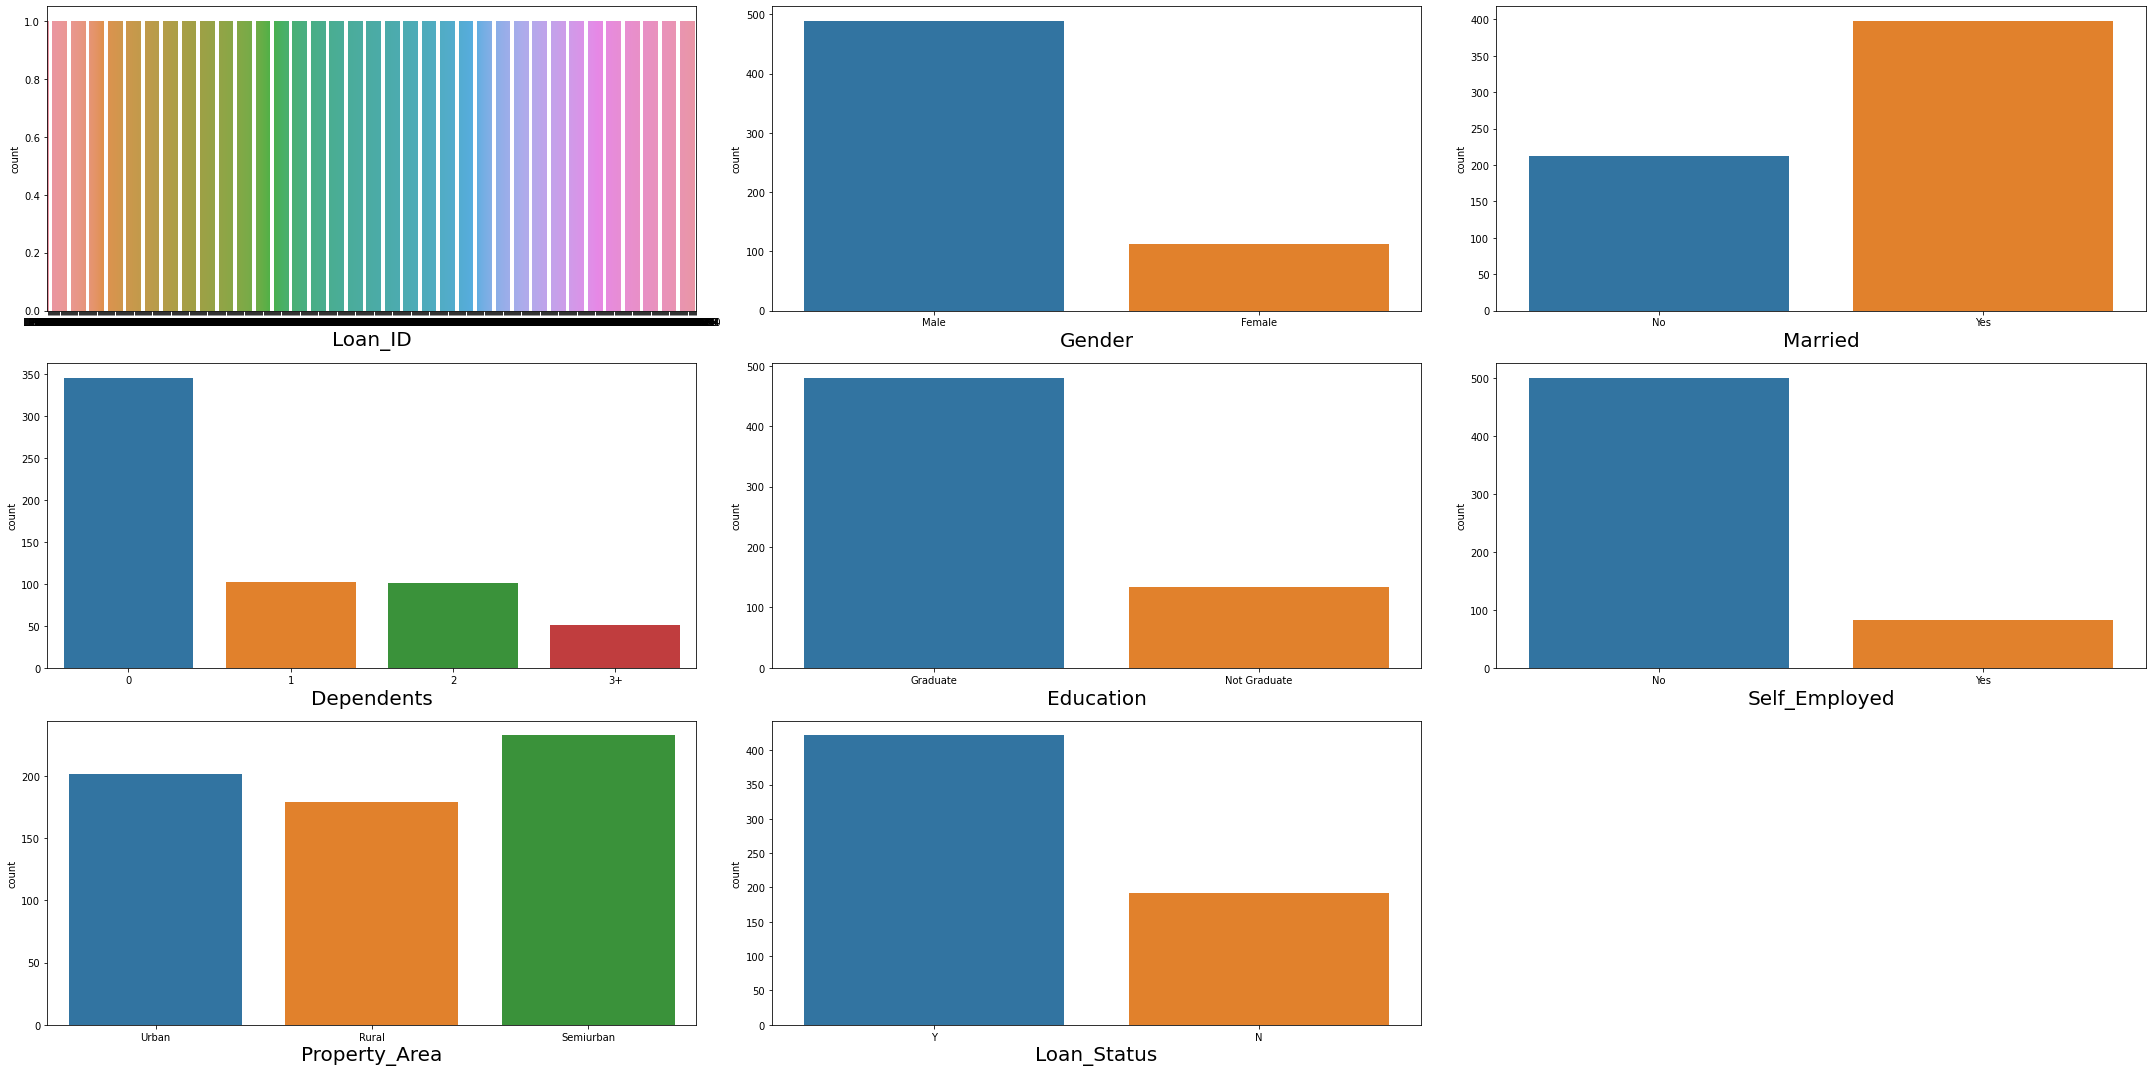

In [20]:
#Check for count distribution and see how data is distributed for every column that has an object data type
plt.figure(figsize=(30,15))#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in features:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.countplot(features[column])#performing a distribution plot for all the columns starting with
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
    print('\n',features[column].value_counts())
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations Univariate Analysis on Categorical Data 
From the above count plots we can see:

- Majority of applicants are male

- Majority of the applicants are married

- Majority of applicants does not have dependents

- Majority of applicants are Graduates

- Majority of applicants work for various employers

- Majority of the properties are distributed in the Semi-urban areas

- Majority of the applicants were granted mortgage

# 3.2 - Data Cleaning(Updating Null Values and Datatype Conversion)

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Observations and Assumptions on Data Cleaining(Null Update and Datatype Conversion)

- We can see only 7 features possess null values; Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and     Credit_History So lets go ahead and fill them up! 


- To use the fillna method, we shall adopt the below based on the datatypes:
    - All Object data will be filled(fillna) with 'mode
    - All Integer data will be filled(fillna) with the 'absolute value' of the mean
    - All floating data will be filled(fillna) mean
    
    
- but before then, we need to ensure the datatypes conversion below are executed according to DOMAIN KNOWLEDGE:
    - the ApplicantIncome data should be converted from integer to Float datatype
    - the Loan_Amount_Term should be converted to from float to integer datatype
    - the Credit_History should be converted to from float to integer datatype

# Adopting Assumptions on Fillna..

In [23]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Now lets recheck if the nulls have been updated...

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Fantastic! All nulls have been fully updated! Data is looking good! lets move to convert features to there appropriate datatype!

# Adopting Assumptions on Datatype conversion...
i.e

- the ApplicantIncome data should be converted from integer to Float datatype

- the Loan_Amount_Term should be converted to from float to integer datatype

- the Credit_History should be converted to from float to integer datatype

In [25]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int)
df['Credit_History']=df['Credit_History'].astype(int)

Now lets recheck if the datatypes have been converted approriately...

In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

Great! Datatypes now showing approriate status!

So we will now move to apply encoding to covert all objects data to numerial data!

# 3.3 - Encoding
- We are fully aware we cannot run an exhaustive EDA on non-numerical data
- This makes it necessary for us to covert all non-numerical data into numerical ones
- To this end, We Shall use Label encoding on all the 7 object columns which has been stored in the features object

In [27]:
#Initializing.....
enc=LabelEncoder()

Now lets write a simple program using our python skills to encode all non-numerical data at once!

In [28]:
#Using the for loop to iterate over the 8 object-columns to produce an encoded version.....
for i in features:
    df[i] = enc.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.000000,360,1,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.000000,180,1,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.000000,360,1,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.000000,360,1,2,1


Now having encoded data, lets check if data types of the 8 object-columns has been changed to intergers....

In [29]:
#Checking for types..
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

# Observations on Encoding 
From the above we can see that;
- All non-numerical(Object) columns have been converted to numerical data! Lets move on!

# 3.4 - Normal Distribution Check(Univariate Analysis)

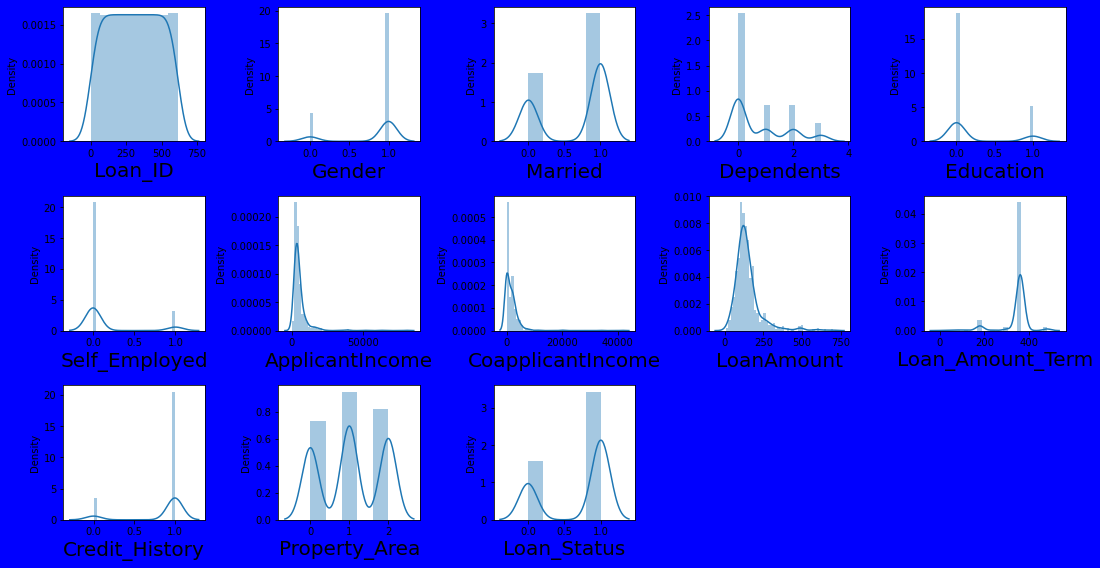

In [30]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in df:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot we can see that majority of features does not obey a normal distribution, the building blocks are not in tandem with a normalized curve:



***The normal distribution of the Loan_Status has no contribution to our Model Building

# 3.5 - Scatter Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the features and the Label

In [31]:
#extracting only the features(wihtout the Label) from the original dataset and store in Features
Features=df.drop('Loan_Status',axis=1)
Features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849.0,0.0,146.412162,360,1,2
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,360,1,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,360,1,2
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,360,1,2
4,4,1,0,0,0,0,6000.0,0.0,141.000000,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.000000,360,1,0
610,610,1,1,3,0,0,4106.0,0.0,40.000000,180,1,0
611,611,1,1,1,0,0,8072.0,240.0,253.000000,360,1,2
612,612,1,1,2,0,0,7583.0,0.0,187.000000,360,1,2


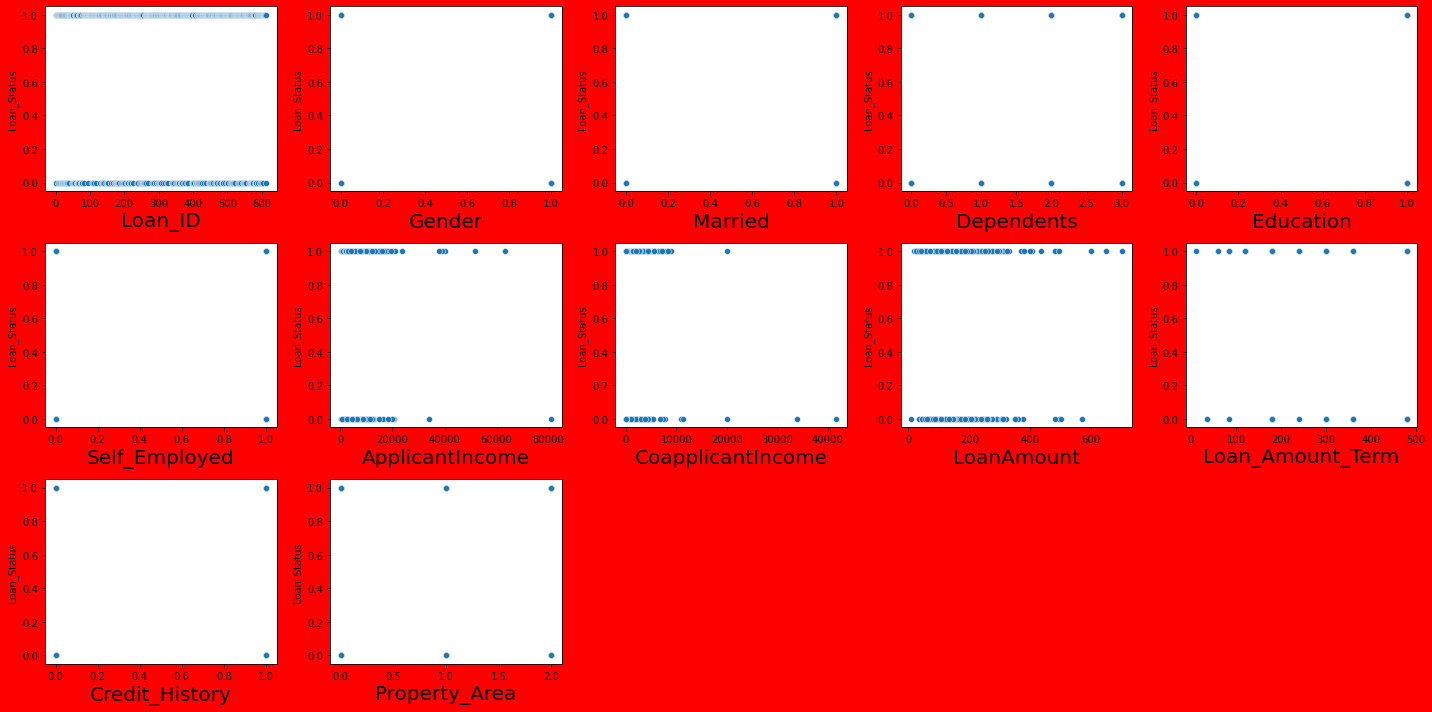

In [32]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(20,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in Features:#triggering your for loop
    if plotnumber<=15:#since there are 8 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=Features[column],y=df['Loan_Status'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 50
        plt.ylabel('Loan_Status',fontsize=10)#labelling the y-axis with a font size of 50
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 34
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between most features and the Label(Loan_Status)! Wow thats great! ...making our feature selection process less difficult as long as multicolinearity does not exist!

# 3.6 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [33]:
#checking for general correlation
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


In [34]:
#checking for correlation between each feature and Label
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

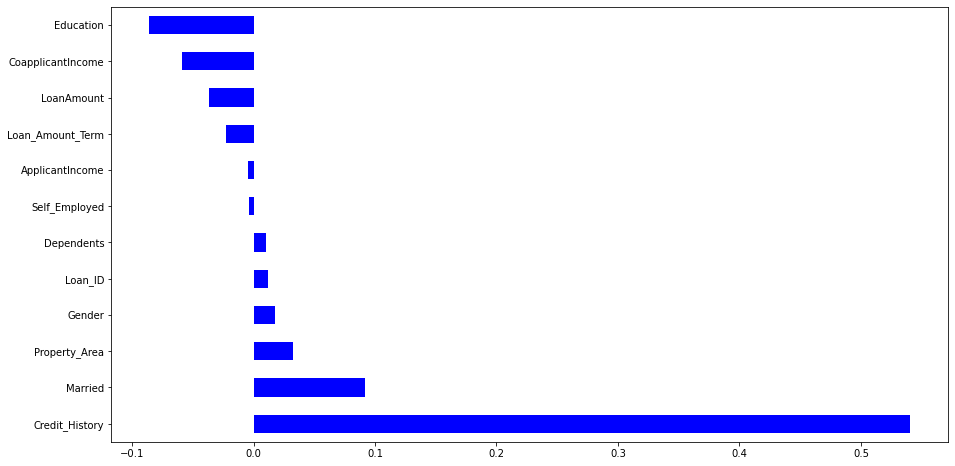

In [35]:
#Plotting a barh chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

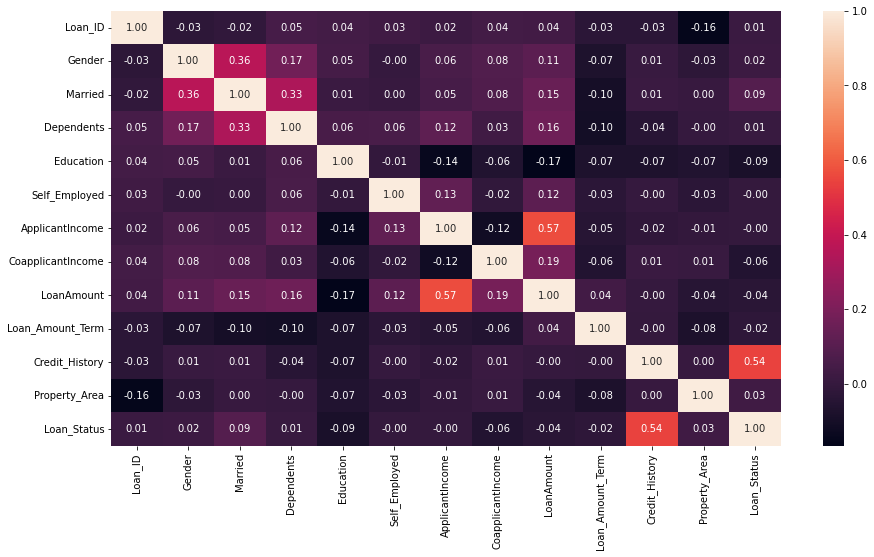

In [36]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

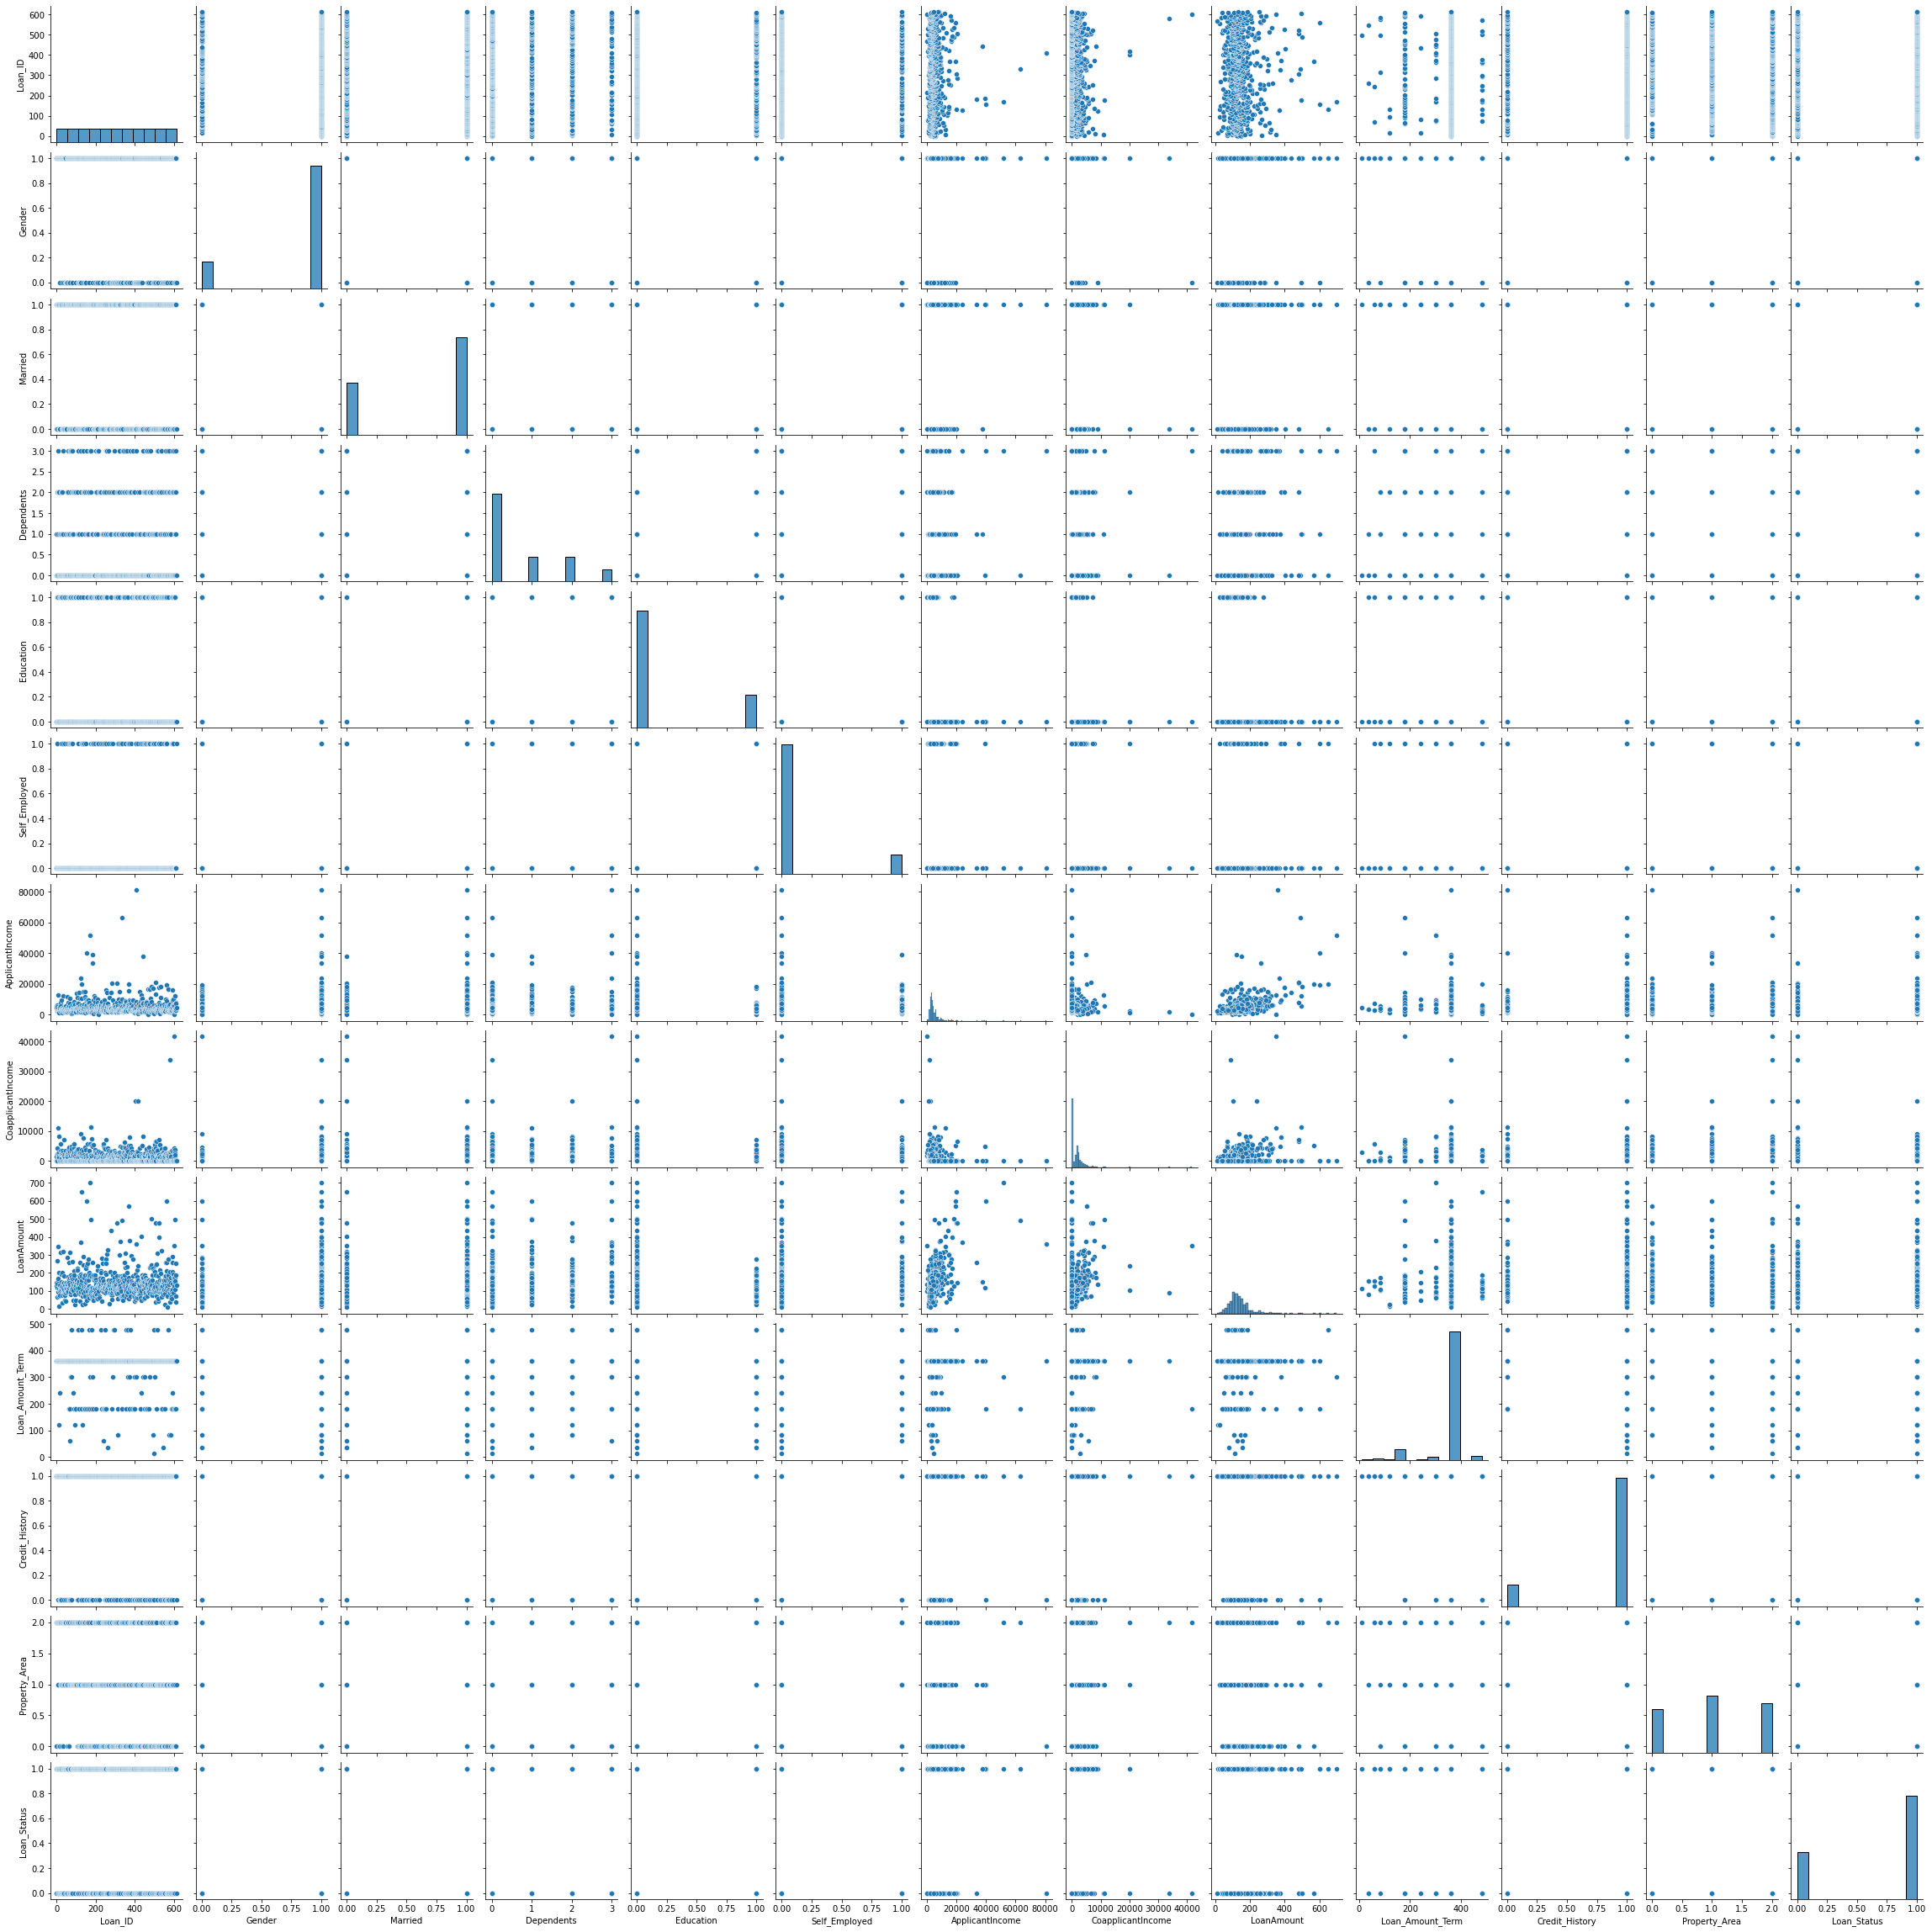

In [37]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [38]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

# Observations on Correlation
From the above correlation statistics;

Collinearity:


- Education has a negative correlation of 9% with the target column which can be considered as weak bond

- CoapplicantIncome has a negative correlation of 6% with the target column which can be considered as weak bond

- LoanAmount has a negative correlation of 4% with the target column which can be considered as weak bond

- Loan_Amount_Term has a negative correlation of 2% with the target column which can be considered as weak bond  

- ApplicantIncome has a negative correlation of 0.005% with the target column which can be considered as a very weak BOND!      
- Self_Employed has a negative correlation of 0.004% with the target column which can be considered as very weak BOND!  

- Dependents has a positive correlation of 1% with the target column which can be considered as weak bond 

- Loan_ID has a positive correlation of 1% with the target column which can be considered as weak bond  

- Gender has a positive correlation of 2% with the target column which can be considered as weak bond 

- Property_Area has a positive correlation of 3% with the target column which can be considered as weak bond  

- Married has a positive correlation of 9% with the target column which can be considered as fair bond

- Credit_History has a positive correlation of 54% with the target column which can be considered as a strong bond  



- Feature with Maximum correlation = Credit_History
- Features with Minimum correlation = ApplicantIncome, Self_Employed
 
Multicollinearity:
 - From the heatmap we can see that little or no pairs of features have some noticeable correllation between them 
But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# 3.7 - Outlier Check(Univariate Analysis)

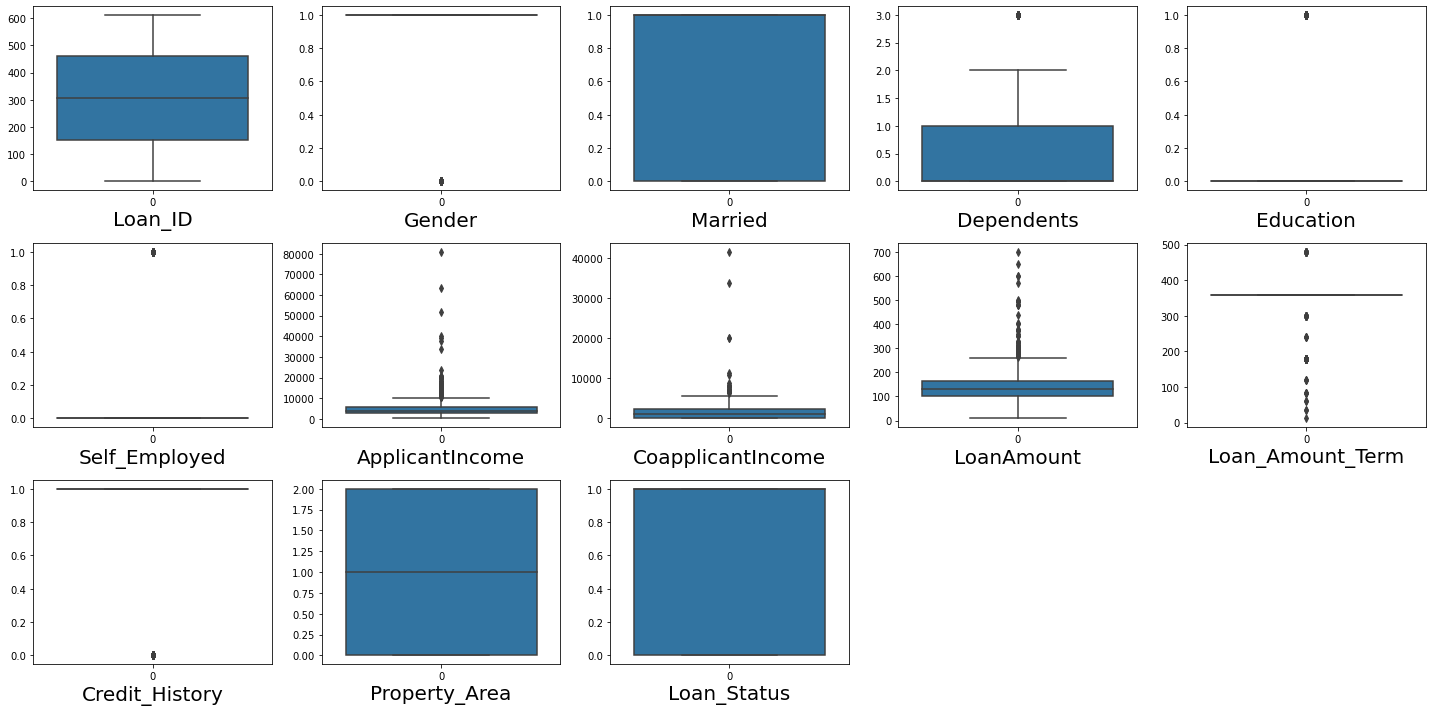

In [39]:
#Check for allien-datapoints in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 15 just to allow for 36 spaces
        plt.subplot(3,5,graph)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that some features posses outliers;

- Gender
- Dependents
- Education
- Selfemployed
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History

However this is subject to further analysis and reconfirmation using the zscore!

# 3.8 - Skewness Check(Univariate Analysis)

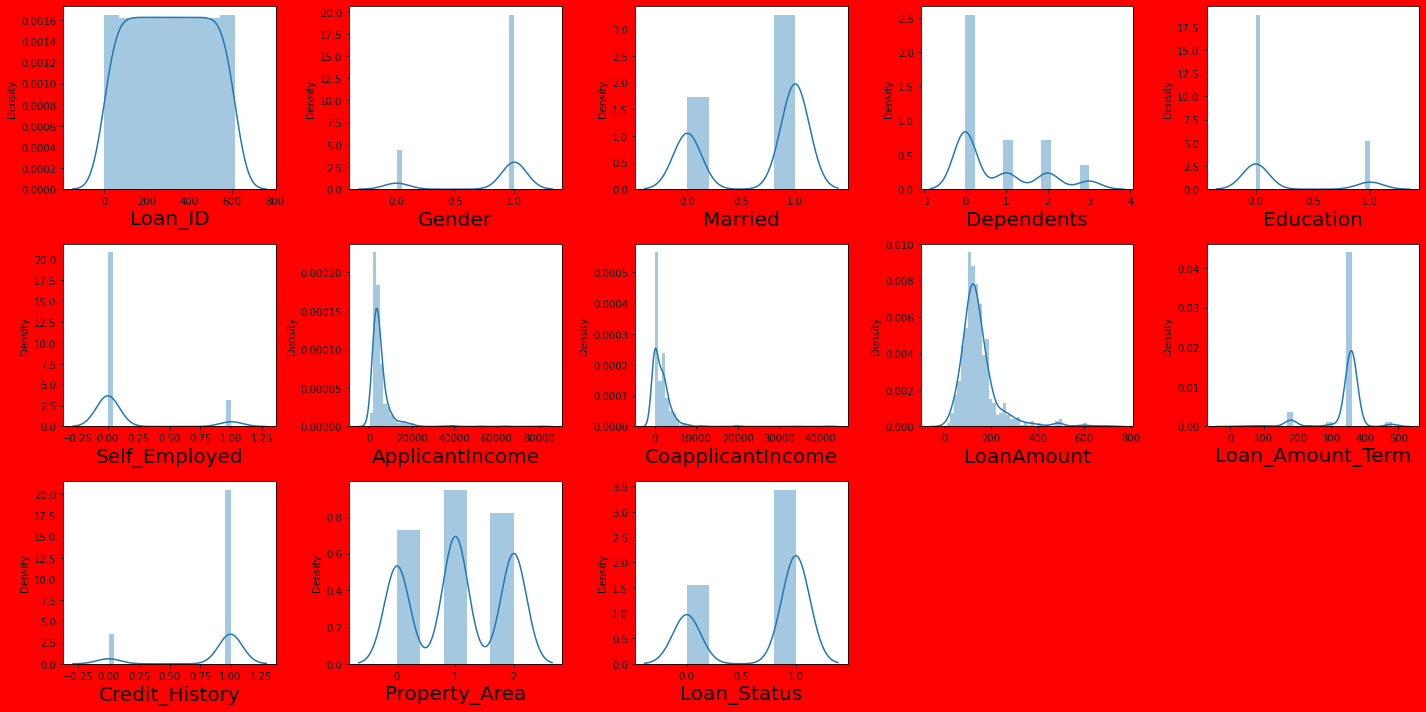

In [40]:
#Visualizing for skewness...
plt.figure(figsize=(20,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=15:#since there are 15 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 35columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

In [41]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'Features'
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.5.Meaning any value outside +/-0.5 contains skewness. Hence majority of the Columns are having skewness:

- Gender:              -1.648795

- Married:             -0.644850

- Dependents:           1.015551

- Education:            1.367622

- Self_Employed:        2.159796

- ApplicantIncome:      6.539513

- CoapplicantIncome:    7.491531

- LoanAmount:           2.726601

- Loan_Amount_Term:    -2.402112

- Credit_History:      -2.021971

- Loan_Status:         -0.809998

***We shall take care of these skewness using Power Transformation!

# 3.9  - Target Variable Check

1    422
0    192
Name: Loan_Status, dtype: int64


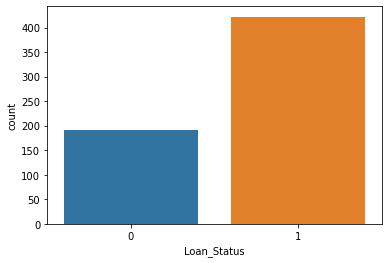

In [42]:
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

- From the above graph the dependent variable has Two classes of with the majority showing Loan status as YES!
- Recall we mentioned an imbalanced/assymetrical distribution of the target data and will be taken care of using SMOTE

# Step 4 - DATA PREPROCESSING

# 4.1 - Removal of Duplicates

In [43]:
#Recheking shape of original data
df.shape

(614, 13)

In [44]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(614, 13)

 - It appears there are no duplicates!

# 4.2 - Rechecking the current Relationship btw Variables

In [45]:
#seperating the variables into X and Y variables
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

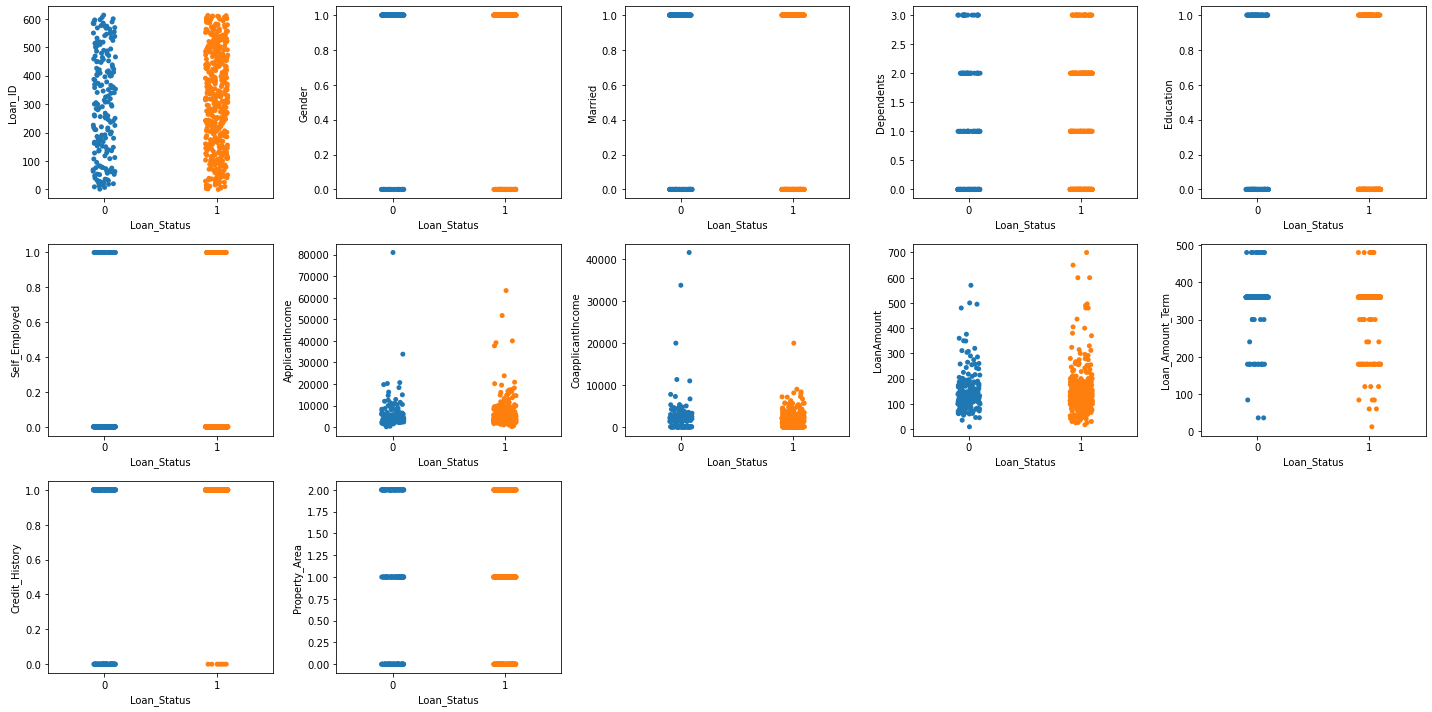

In [46]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(20,10))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=15:#since there are 9 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 6-rows and 6-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()

From the above strip plot, you can see a relationship between the target variable and most features!

# 4.3 - Feature Selection(Dropping of Features that has no correlation with target variable and once that strongly promotes multicollinearity(VIF))

In [47]:
#Now rechecking for correlation....
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


In [48]:
#Now lets compare correlation with target variable
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

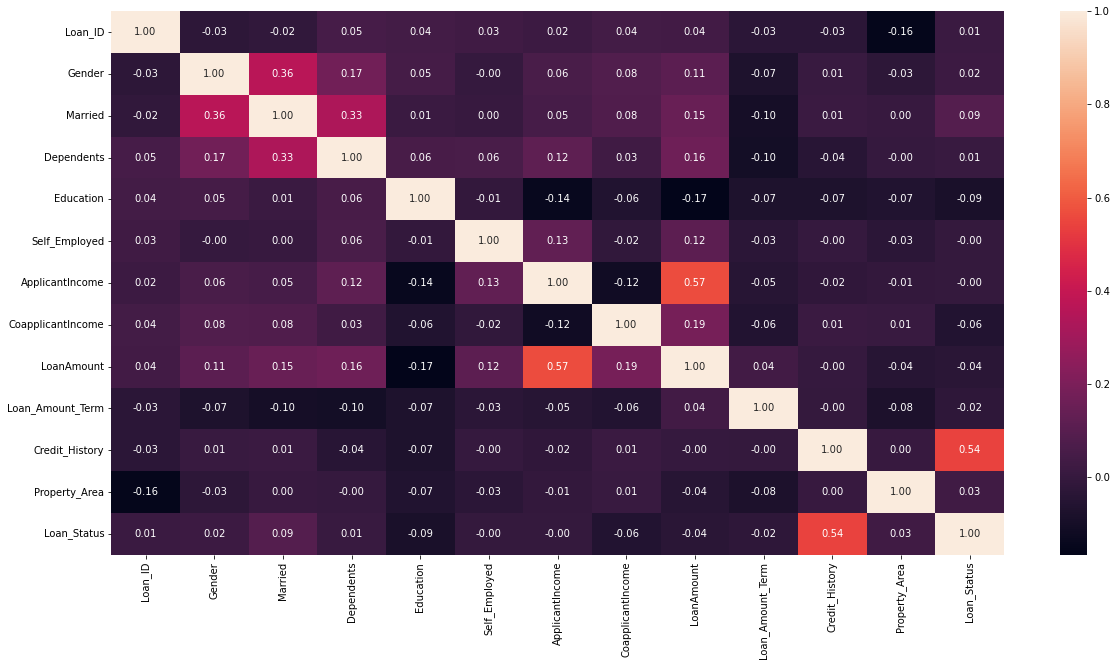

In [49]:
#Lets also have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap we can see only map-square was brightened;

- LoanAmount vs ApllicationIncome
 
However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [50]:
#Initializing....
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)#Recall that all features has been stored in X earlier..
X_Scaled

array([[-1.72923217,  0.47234264, -1.37208932, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [-1.7235903 ,  0.47234264,  0.72881553, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [-1.71794844,  0.47234264,  0.72881553, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       ...,
       [ 1.71794844,  0.47234264,  0.72881553, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 1.7235903 ,  0.47234264,  0.72881553, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 1.72923217, -2.11710719, -1.37208932, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

In [51]:
#checking the shape
X_Scaled.shape

(614, 12)

Now we shall treat the above shape as an array of numbers(tuple) where 614 and 12 are the zeroth and first index respectively.

In [52]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [53]:
#Using a list comprehension....
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10....33), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 12. Now all the columns in X_Scaled will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [54]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

,vif,Features
0,1.036534,Loan_ID
1,1.171590,Gender
2,1.282462,Married
3,1.168149,Dependents
4,1.063801,Education
5,1.024163,Self_Employed
6,1.631121,ApplicantIncome
7,1.142266,CoapplicantIncome
8,1.710302,LoanAmount
9,1.050661,Loan_Amount_Term


From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption it mean MULTICOLLINEARITY DOES NOT EXIST!

Hence in the nut-shell, we will be dropping the below features as they do not impact our data set based on domain Knowledge;

- Loan_ID: This is just an Identifier

- Married: Marital status does not impact rather dependents do!

- Gender: The applicant's sexuality has no impact as women are now gainfully employed!

In [55]:
#Dropping the values above
df.drop(columns=['Loan_ID','Married','Gender'],axis=1,inplace=True)
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900.0,0.0,71.000000,360,1,0,1
610,3,0,0,4106.0,0.0,40.000000,180,1,0,1
611,1,0,0,8072.0,240.0,253.000000,360,1,2,1
612,2,0,0,7583.0,0.0,187.000000,360,1,2,1


# 4.4 - Removal of Outliers

This will be achieved using the zscore

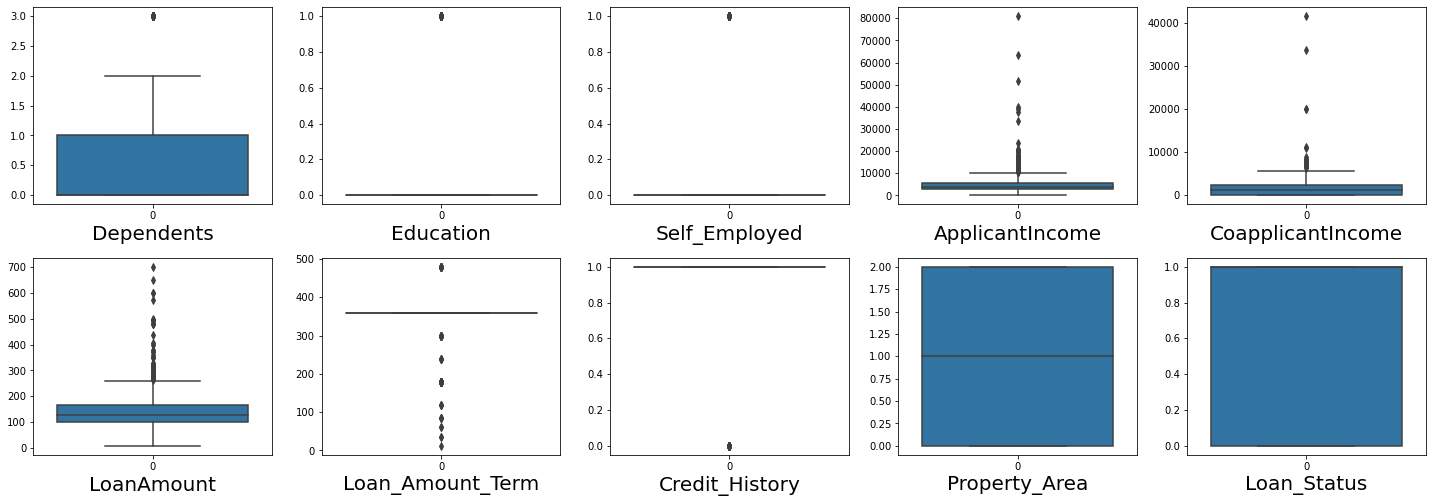

In [56]:
#Checking again for allien-datapoints in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 15 just to allow for 15 spaces
        plt.subplot(3,5,graph)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

In [57]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.273231,0.411733,1.223298,0.674519
1,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.273231,0.411733,1.318513,1.482537
2,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.273231,0.411733,1.223298,0.674519
3,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.273231,0.411733,1.223298,0.674519
4,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...
609,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.273231,0.411733,1.318513,0.674519
610,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.522836,0.411733,1.318513,0.674519
611,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.273231,0.411733,1.223298,0.674519
612,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.273231,0.411733,1.223298,0.674519


In [58]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(614, 10)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [59]:
#index number
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([4, 6, 6, 6, 3, 5, 6, 3, 5, 3, 5, 4, 5, 3, 3, 6, 6, 5, 5, 6, 3, 5,
        5, 4, 3, 4, 5, 3, 5, 6, 6, 5, 5, 5, 6, 5, 6, 4, 6, 4, 5],
       dtype=int64))

In [60]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (614, 10)
New DataFrame (577, 10)
total_dropped_rows 37


A Total of 37 outliers have been removed! Lets move on!

In [61]:
#Checking the new dataframe with non-outliers
df_new

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900.0,0.0,71.000000,360,1,0,1
610,3,0,0,4106.0,0.0,40.000000,180,1,0,1
611,1,0,0,8072.0,240.0,253.000000,360,1,2,1
612,2,0,0,7583.0,0.0,187.000000,360,1,2,1


Now we need to reset our data having removed outliers.....

In [62]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,2,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,3,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,4,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
572,609,0,0,0,2900.0,0.0,71.000000,360,1,0,1
573,610,3,0,0,4106.0,0.0,40.000000,180,1,0,1
574,611,1,0,0,8072.0,240.0,253.000000,360,1,2,1
575,612,2,0,0,7583.0,0.0,187.000000,360,1,2,1


In [63]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,2900.0,0.0,71.000000,360,1,0,1
573,3,0,0,4106.0,0.0,40.000000,180,1,0,1
574,1,0,0,8072.0,240.0,253.000000,360,1,2,1
575,2,0,0,7583.0,0.0,187.000000,360,1,2,1


Now lets see how the allien-values(outliers) have been booted-out!

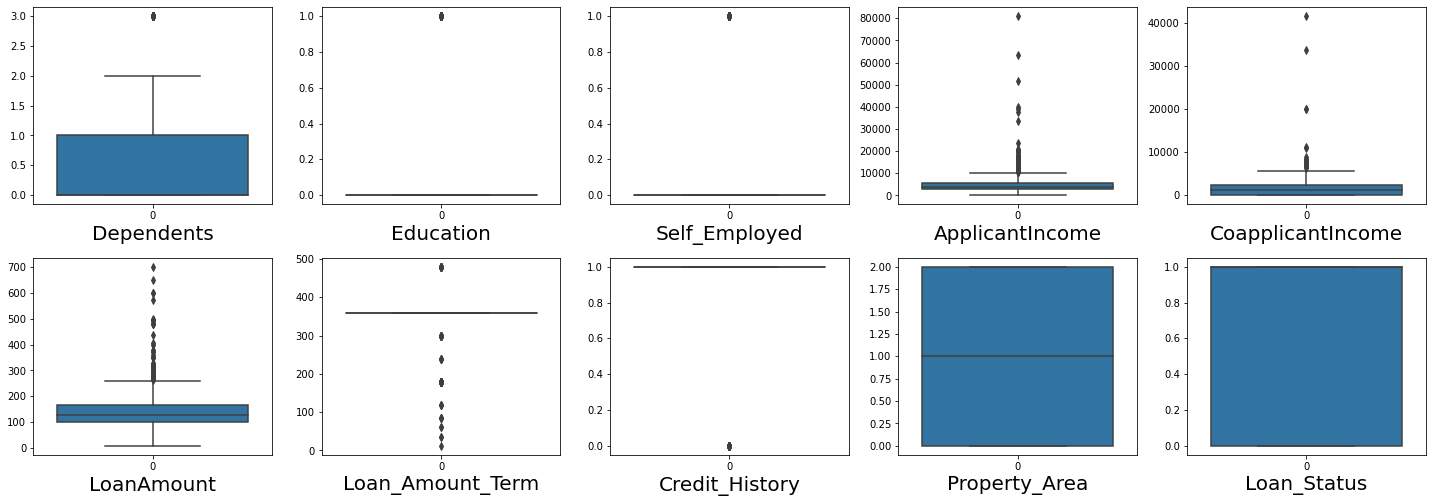

In [64]:
#rechecking again for allien-datapoints(outliers) in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 15 just to allow for 15 spaces
        plt.subplot(3,5,graph)#3,5 means arrange the graphs in 3-rows and 9-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# 4.5 - Transforming Data to Remove Skewness using Power transformation

In [65]:
#rechecking for skewness...
df_new.skew()

Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Lets assume Skewness threshold is taken as +/-0.5.Meaning any value outside +/-0.5 contains skewness. Hence majority of the Columns are having skewness;


- Dependents:           1.052106

- Education:            1.306588

- Self_Employed:        2.252848

- ApplicantIncome:      2.148522

- CoapplicantIncome:    1.350517

- LoanAmount:           1.113132

- Loan_Amount_Term:    -2.098806

- Credit_History:      -1.976043

- Loan_Status:         -0.822635


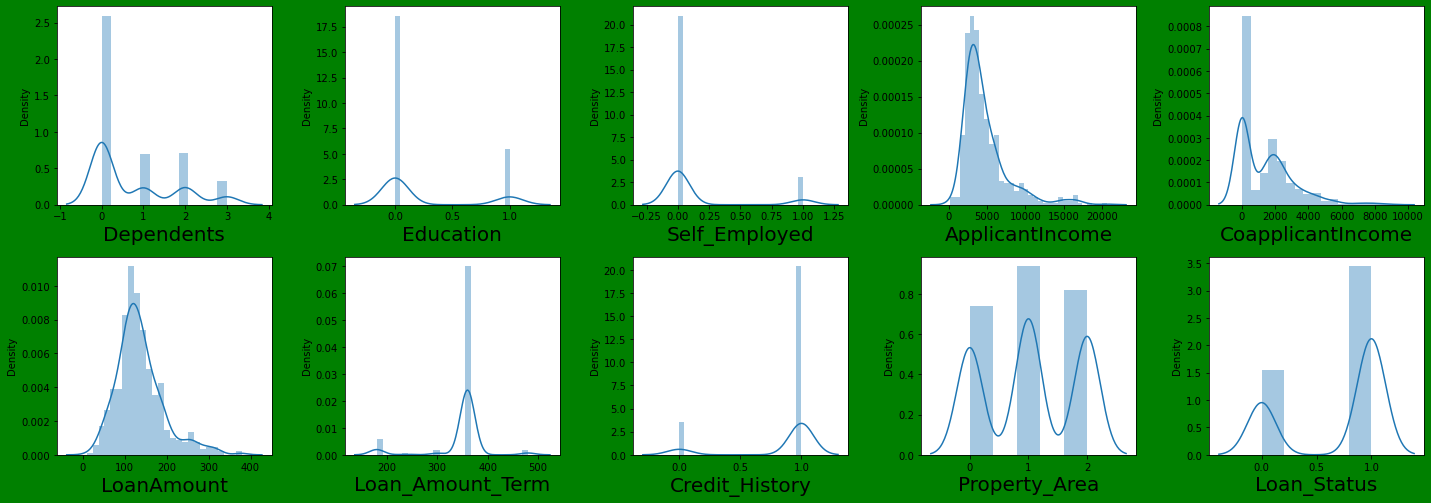

In [66]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(20,10), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

Before we apply Power Transformation lets remove all non-zero values from the features which were initially of interger datatypes(excluding the encoded independent variables)

In [67]:
#recall all the initial categorical variables(object) were stored in features...
features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


- Here we shall use 'MODE' for all interger type!

- Here we shall use 'MEAN' for all floating type!

Culling-out columns that were originally of interger and floating data types(excluding object columns).....

However we won't apply such to CoapplicantIncome since a co-applicant like spouse, son, daughter can have zero income!

In [68]:
df_new['Loan_Amount_Term']=df_new['Loan_Amount_Term'].replace(0,df_new['Loan_Amount_Term'].mode()[0])
df_new['ApplicantIncome']=df_new['ApplicantIncome'].replace(0,df_new['ApplicantIncome'].mean())
df_new['LoanAmount']=df_new['LoanAmount'].replace(0,df_new['LoanAmount'].mean())
df_new

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849.0,0.0,146.412162,360,1,2,1
1,1,0,0,4583.0,1508.0,128.000000,360,1,0,0
2,0,0,1,3000.0,0.0,66.000000,360,1,2,1
3,0,1,0,2583.0,2358.0,120.000000,360,1,2,1
4,0,0,0,6000.0,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,2900.0,0.0,71.000000,360,1,0,1
573,3,0,0,4106.0,0.0,40.000000,180,1,0,1
574,1,0,0,8072.0,240.0,253.000000,360,1,2,1
575,2,0,0,7583.0,0.0,187.000000,360,1,2,1


Data is looking good, now lets go ahead with Power Transformation!

In [69]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

Reconfirming items that are skeweed.....


- Dependents:           1.052106

- Education:            1.306588

- Self_Employed:        2.252848

- ApplicantIncome:      2.148522

- CoapplicantIncome:    1.350517

- LoanAmount:           1.113132

- Loan_Amount_Term:    -2.098806

- Credit_History:      -1.976043

- Loan_Status:         -0.822635

This means all data features are skewed except Property_Area(-0.055332)

Target data(Loan_Status) is not considered for skewness removal!

In [70]:
skewed_data=df_new.drop(columns=['Property_Area','Loan_Status'],axis=1)
skewed_data

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,5849.0,0.0,146.412162,360,1
1,1,0,0,4583.0,1508.0,128.000000,360,1
2,0,0,1,3000.0,0.0,66.000000,360,1
3,0,1,0,2583.0,2358.0,120.000000,360,1
4,0,0,0,6000.0,0.0,141.000000,360,1
...,...,...,...,...,...,...,...,...
572,0,0,0,2900.0,0.0,71.000000,360,1
573,3,0,0,4106.0,0.0,40.000000,180,1
574,1,0,0,8072.0,240.0,253.000000,360,1
575,2,0,0,7583.0,0.0,187.000000,360,1


In [71]:
#rechecking elements slated for skewness removal...
skewed_data.columns

Index(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [72]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[skewed_data.columns] = scaler.fit_transform(df_new[skewed_data.columns].values)

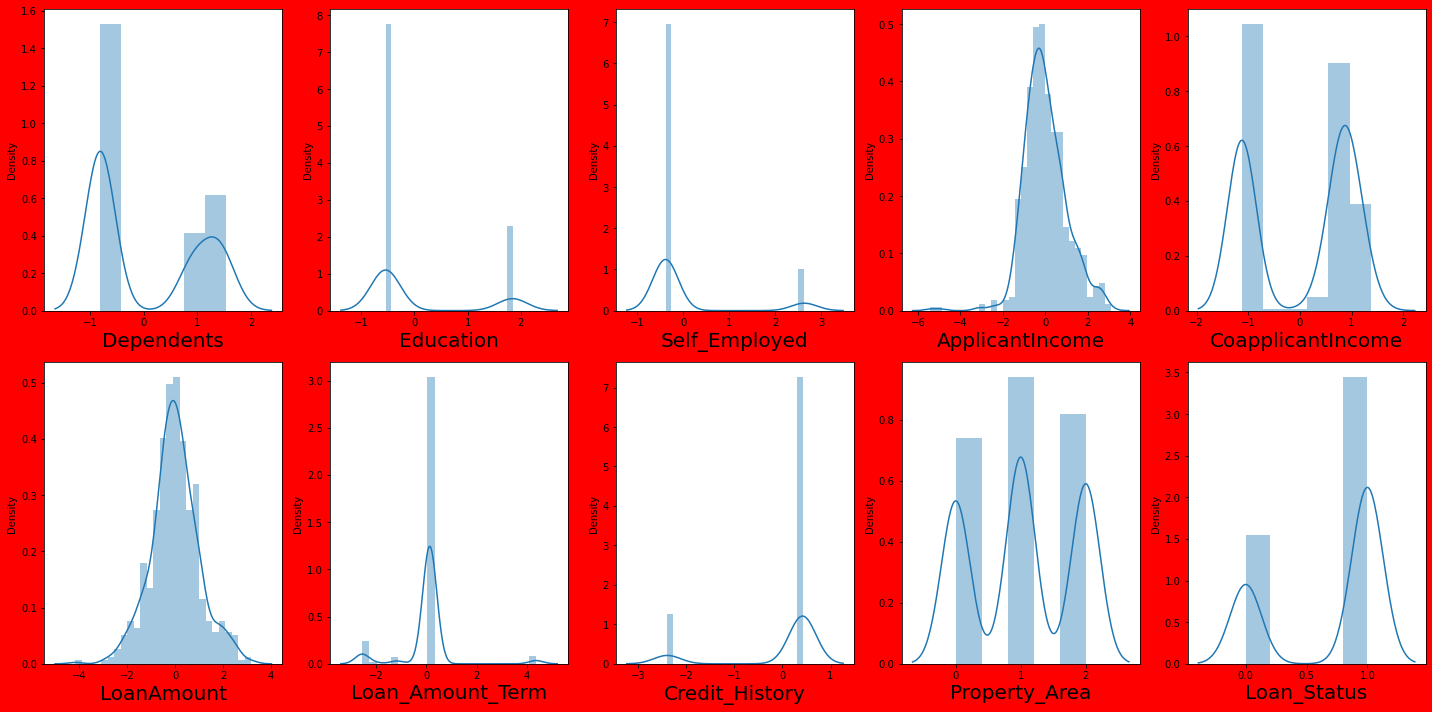

In [73]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(20,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=10:#since there are 10 features
        ax = plt.subplot(2,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [74]:
df_new.skew()

Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

From the above we can see that skewness has been removed for columns that were initially of continuos data type!

# 4.6 - Seperating the datasets into X and Y variables

In [75]:
#seperation
X=df_new.drop(columns=['Loan_Status'])
Y=df_new['Loan_Status']

# Transforming data into standard normal distribution

In [76]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.80924269, -0.54196123, -0.38058018, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 0.90286851, -0.54196123, -0.38058018, ...,  0.13078824,
         0.41851254, -1.30652215],
       [-0.80924269, -0.54196123,  2.62756724, ...,  0.13078824,
         0.41851254,  1.22747207],
       ...,
       [ 0.90286851, -0.54196123, -0.38058018, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 1.34467098, -0.54196123, -0.38058018, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-0.80924269, -0.54196123,  2.62756724, ...,  0.13078824,
        -2.38941464, -0.03952504]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [77]:
#reconfirming that mean is 0
X_Scaled.mean()

-9.064790341634246e-18

In [78]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# 4.7 - Imbalancing of Target Variable

1    398
0    179
Name: Loan_Status, dtype: int64


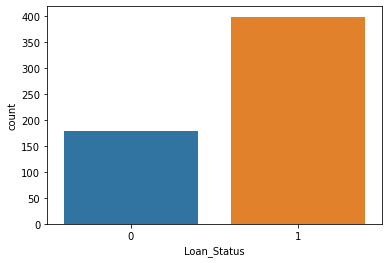

In [79]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='Loan_Status',data=df_new)
print(df_new['Loan_Status'].value_counts())

From the above graph we can see:

- the dependent variable has two classes with the majority being Class - YES(Loan Approved) and minority Class - NO(Unapproved)

- there is a clear case of slight imbalanced data and this will be resolved during futher preprocessing using sampling techniques(SMOTE)

# Step 5 - MODEL BUILDING

# 5.1 - Logistic Regression

# Best Random State

# Best Random State and Balancing Target Data(Oversampling)

In [86]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  78.4 and 74.2 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  82.8 and 77.7 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.0 and 73.6 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  75.9 and 73.6 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 91.4% at random state 12

We have found best_random state value as 12. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [93]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 309, 0: 152})
The number of classes after fitCounter({1: 309, 0: 262})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 152 to 262.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [94]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  89.66
Confusion Matrix  [[17 10]
 [ 2 87]]
Classification Report                precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           1       0.90      0.98      0.94        89

    accuracy                           0.90       116
   macro avg       0.90      0.80      0.84       116
weighted avg       0.90      0.90      0.89       116



LogisticRegression is producing good accuracy 90%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [95]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.81034483 0.79310345 0.79130435 0.86086957 0.84347826]
Cross Validation Score is  0.8198200899550224


# Difference between Accuracy Score and Cross Validation Score

In [96]:
Test_Accuracy_lr

0.896551724137931

In [97]:
CV_Score_lr

0.8198200899550224

In [98]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.07673163418290863


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.076) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [114]:
#Using Decision Tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    dt.fit(x_train_ns,y_train_ns)
    pred_train=dt.predict(x_train_ns)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  71.6 and 100.0 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  74.1 and 100.0 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  70.7 and 100.0 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  67.2 and 100.0 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 80.2% at random state 133

We have found best_random state value as 133. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=133,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [110]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 315, 0: 146})
The number of classes after fitCounter({1: 315, 0: 267})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 146 to 267

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [111]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  78.45
Confusion Matrix  [[20 13]
 [12 71]]
Classification Report                precision    recall  f1-score   support

           0       0.62      0.61      0.62        33
           1       0.85      0.86      0.85        83

    accuracy                           0.78       116
   macro avg       0.74      0.73      0.73       116
weighted avg       0.78      0.78      0.78       116



Decision Tree Model is producing good accuracy; 78%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [112]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.73275862 0.69827586 0.74782609 0.73043478 0.70434783]
Cross Validation Score is  0.7227286356821588


# Difference between Accuracy Score and Cross Validation Score

In [113]:
Test_Accuracy_dt

0.7844827586206896

In [114]:
CV_Score_dt

0.7227286356821588

In [115]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.061754122938530775


From the above you can see that difference between Accuracy and Cross Validation score is low(0.061) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# 5.3 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [140]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.3 and 100.0 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  72.4 and 100.0 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.6 and 100.0 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 84.5% at random state 12

We have found best_random state value as 12. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [116]:
#using the random state of 12
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [117]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 309, 0: 152})
The number of classes after fitCounter({1: 309, 0: 262})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 144 to 269.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [118]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.62
Confusion Matrix  [[18  9]
 [10 79]]
Classification Report                precision    recall  f1-score   support

           0       0.64      0.67      0.65        27
           1       0.90      0.89      0.89        89

    accuracy                           0.84       116
   macro avg       0.77      0.78      0.77       116
weighted avg       0.84      0.84      0.84       116



RandomForest Classifier is producing very good accuracy = 84%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [119]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.77586207 0.75862069 0.8        0.86086957 0.80869565]
Cross Validation Score is  0.8008095952023988


# Difference between Accuracy Score and Cross Validation Score

In [120]:
Test_Accuracy_rf

0.8362068965517241

In [121]:
CV_Score_rf

0.8008095952023988

In [122]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.03539730134932528


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.0353) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [154]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.6 and 83.0 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  73.3 and 85.1 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  69.8 and 82.5 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  75.0 and 83.3 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 86.2% at random state 83

We have found best_random state value as 83. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [126]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=83,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [127]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 316, 0: 145})
The number of classes after fitCounter({1: 316, 0: 268})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 145 to 268

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [128]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.62
Confusion Matrix  [[22 12]
 [ 7 75]]
Classification Report                precision    recall  f1-score   support

           0       0.76      0.65      0.70        34
           1       0.86      0.91      0.89        82

    accuracy                           0.84       116
   macro avg       0.81      0.78      0.79       116
weighted avg       0.83      0.84      0.83       116



AdaBoostClassifier is producing good accuracy = 84%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [129]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.76724138 0.75862069 0.79130435 0.85217391 0.80869565]
Cross Validation Score is  0.795607196401799


# Difference between Accuracy Score and Cross Validation Score

In [130]:
Test_Accuracy_ada

0.8362068965517241

In [131]:
CV_Score_ada

0.795607196401799

In [132]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.04059970014992509


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.041) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [165]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.6 and 90.7 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  76.7 and 92.1 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.0 and 89.9 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  80.2 and 89.5 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 83.6% at random state 86


We have found best_random state value as 86. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [133]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=86,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [134]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 322, 0: 139})
The number of classes after fitCounter({1: 322, 0: 273})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 144 to 269.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [135]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  82.76
Confusion Matrix  [[22 18]
 [ 2 74]]
Classification Report                precision    recall  f1-score   support

           0       0.92      0.55      0.69        40
           1       0.80      0.97      0.88        76

    accuracy                           0.83       116
   macro avg       0.86      0.76      0.78       116
weighted avg       0.84      0.83      0.81       116



GradientBoosting Classifier is producing good accuracy = 83%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [136]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.74137931 0.74137931 0.77391304 0.83478261 0.8173913 ]
Cross Validation Score is  0.7817691154422789


# Difference between Accuracy Score and Cross Validation Score

In [137]:
Test_Accuracy_gb

0.8275862068965517

In [138]:
CV_Score_gb

0.7817691154422789

In [139]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.04581709145427282


From the above you can see that difference between Accuracy and Cross Validation score is low(0.045) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# 5.6 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [176]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  75.9 and 100.0 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  74.1 and 100.0 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  74.1 and 100.0 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  75.0 and 100.0 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 82.8% at random state 38

We have found best_random state value as 38. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [157]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=38,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [158]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 315, 0: 146})
The number of classes after fitCounter({1: 315, 0: 267})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 153 to 261.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [159]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  81.9
Confusion Matrix  [[21 12]
 [ 9 74]]
Classification Report                precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.86      0.89      0.88        83

    accuracy                           0.82       116
   macro avg       0.78      0.76      0.77       116
weighted avg       0.81      0.82      0.82       116



XGBoost Classifier is producing good accuracy = 82%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [160]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.74137931 0.76724138 0.80869565 0.79130435 0.79130435]
Cross Validation Score is  0.7799850074962519


# Difference between Accuracy Score and Cross Validation Score

In [161]:
Test_Accuracy_xgb

0.8189655172413793

In [162]:
CV_Score_xgb

0.7799850074962519

In [163]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.038980509745127456


From the above you can see that difference between Accuracy and Cross Validation score is low(0.039) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# 5.7 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [187]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.6 and 100.0 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  77.6 and 100.0 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  77.6 and 100.0 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  71.6 and 100.0 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Tra

The best accuracy is 84.5% at random state 190

We have found best_random state value as 190 We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [164]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=190,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [165]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 319, 0: 142})
The number of classes after fitCounter({1: 319, 0: 271})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 148 to 266.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [166]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.48
Confusion Matrix  [[28  9]
 [ 9 70]]
Classification Report                precision    recall  f1-score   support

           0       0.76      0.76      0.76        37
           1       0.89      0.89      0.89        79

    accuracy                           0.84       116
   macro avg       0.82      0.82      0.82       116
weighted avg       0.84      0.84      0.84       116



ExtraTress Classifier is producing good accuracy = 84%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [167]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.75       0.75       0.79130435 0.80869565 0.76521739]
Cross Validation Score is  0.7730434782608695


# Difference between Accuracy Score and Cross Validation Score

In [168]:
Test_Accuracy_ex

0.8448275862068966

In [169]:
CV_Score_ex

0.7730434782608695

In [170]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.07178410794602708


From the above you can see that difference between Accuracy and Cross Validation score is low(0.071) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [201]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.3 and 77.7 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  81.9 and 80.2 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  78.4 and 79.7 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  75.9 and 81.1 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 88.8% at random state 12

We have found best_random state value as 12. We will now create our tain_test_split using this randome_state

# Creating train_test_split....

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [172]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 309, 0: 152})
The number of classes after fitCounter({1: 309, 0: 262})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 152 to 262.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [173]:
sv=SVC()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  87.93
Confusion Matrix  [[18  9]
 [ 5 84]]
Classification Report                precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.90      0.94      0.92        89

    accuracy                           0.88       116
   macro avg       0.84      0.81      0.82       116
weighted avg       0.88      0.88      0.88       116



Support Vector is producing good accuracy = 88%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [174]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.81896552 0.78448276 0.79130435 0.86956522 0.82608696]
Cross Validation Score is  0.8180809595202397


# Difference between Accuracy Score and Cross Validation Score

In [175]:
Test_Accuracy_sv

0.8793103448275862

In [176]:
CV_Score_sv

0.8180809595202397

In [177]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06122938530734645


From the above you can see that difference between Accuracy and Cross Validation score is low(0.061) meaning that our model is very good and not having any overfitting or underfitting problems!!

# 5.9 - MLP Classifier

# Best Random State and Balancing Data(Oversampling)

In [209]:
#Using MLP Classifier to get the best Random state and apply SMOTE Oversampling technique
mlp=MLPClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    mlp.fit(x_train_ns,y_train_ns)
    pred_train=mlp.predict(x_train_ns)
    pred_test=mlp.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  75.9 and 82.6 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  76.7 and 83.7 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.9 and 82.0 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  76.7 and 82.5 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 87.9% at random state 158

We have found best_random state value as 158. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=158,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [179]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 313, 0: 148})
The number of classes after fitCounter({1: 313, 0: 266})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 148 to 266.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [180]:
mlp=MLPClassifier()
mlp.fit(x_train_ns,y_train_ns)
pred_test=mlp.predict(x_test)
pred_train=mlp.predict(x_train_ns)
Test_Accuracy_mlp= (accuracy_score(y_test,pred_test))
Train_Accuracy_mlp= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  87.93
Confusion Matrix  [[19 12]
 [ 2 83]]
Classification Report                precision    recall  f1-score   support

           0       0.90      0.61      0.73        31
           1       0.87      0.98      0.92        85

    accuracy                           0.88       116
   macro avg       0.89      0.79      0.83       116
weighted avg       0.88      0.88      0.87       116



MLP Classifier is producing good accuracy = 88%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [181]:
#Validation accuracy
vac=cross_val_score(mlp,X,Y,cv=5)
CV_Score_mlp=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_mlp)

[0.80172414 0.77586207 0.80869565 0.84347826 0.80869565]
Cross Validation Score is  0.8076911544227887


# Difference between Accuracy Score and Cross Validation Score

In [182]:
Test_Accuracy_mlp

0.8793103448275862

In [183]:
CV_Score_mlp

0.8076911544227887

In [184]:
mlp_Acc_vs_CV_Score=np.abs(Test_Accuracy_mlp-CV_Score_mlp)
print("Difference between Accuracy and Cross Validation Score = ",mlp_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.07161919040479747


From the above you can see that difference between Accuracy and Cross Validation score is low(0.071) meaning that our model is very good and not having any overfitting or underfitting problems!!

# 5.10 - GaussianNB Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [218]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
nb=GaussianNB()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    nb.fit(x_train_ns,y_train_ns)
    pred_train=nb.predict(x_train_ns)
    pred_test=nb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({1: 321, 0: 140})
The number of classes before fitCounter({1: 321, 0: 272})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.3 and 73.7 respectively
The number of classes before fitCounter({1: 315, 0: 146})
The number of classes before fitCounter({1: 315, 0: 267})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  82.8 and 74.7 respectively
The number of classes before fitCounter({1: 322, 0: 139})
The number of classes before fitCounter({1: 322, 0: 273})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  80.2 and 75.1 respectively
The number of classes before fitCounter({1: 318, 0: 143})
The number of classes before fitCounter({1: 318, 0: 270})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.6 and 76.2 respectively
The number of classes before fitCounter({1: 324, 0: 137})
The number of classes before fitCounter({1: 324, 0: 275})
At random state:- 4 Testing Accuracy and Trainin

The best accuracy is 92.2% at random state 12

We have found best_random state value as 12. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [185]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=12,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [186]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({1: 309, 0: 152})
The number of classes after fitCounter({1: 309, 0: 262})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 152 to 262.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement


In [187]:
nb=GaussianNB()
nb.fit(x_train_ns,y_train_ns)
pred_test=nb.predict(x_test)
pred_train=nb.predict(x_train_ns)
Test_Accuracy_nb= (accuracy_score(y_test,pred_test))
Train_Accuracy_nb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  92.24
Confusion Matrix  [[19  8]
 [ 1 88]]
Classification Report                precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.92      0.99      0.95        89

    accuracy                           0.92       116
   macro avg       0.93      0.85      0.88       116
weighted avg       0.92      0.92      0.92       116



GaussianNB is producing good accuracy 92%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [188]:
#Validation accuracy
vac=cross_val_score(nb,X,Y,cv=5)
CV_Score_nb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_nb)

[0.81034483 0.79310345 0.8        0.86956522 0.82608696]
Cross Validation Score is  0.8198200899550224


# Difference between Accuracy Score and Cross Validation Score

In [189]:
Test_Accuracy_nb

0.9224137931034483

In [190]:
CV_Score_nb

0.8198200899550224

In [191]:
nb_Acc_vs_CV_Score=np.abs(Test_Accuracy_nb-CV_Score_nb)
print("Difference between Accuracy and Cross Validation Score = ",nb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.10259370314842586


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.102) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

 Now that we have build 10 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL TEN MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [192]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression','DecisionTree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier','MLP Classifier','GaussianNB Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv,Test_Accuracy_mlp,Test_Accuracy_nb],'Cross_Validation_Score':[CV_Score_lr,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv,CV_Score_mlp,CV_Score_nb],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score,mlp_Acc_vs_CV_Score,nb_Acc_vs_CV_Score]})
models

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Logistic Regression,0.896552,0.819820,0.076732
1,DecisionTree Classifier,0.784483,0.722729,0.061754
2,Random Forest Classifier,0.836207,0.800810,0.035397
3,Ada Boosting Classifier,0.836207,0.795607,0.040600
4,Gradient Boosting Classifier,0.827586,0.781769,0.045817
5,XgBoost,0.818966,0.779985,0.038981
6,Extra Trees Classifer,0.844828,0.773043,0.071784
7,Support Vector Classifier,0.879310,0.818081,0.061229
8,MLP Classifier,0.879310,0.807691,0.071619
9,GaussianNB Classifier,0.922414,0.819820,0.102594


In [193]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
9,GaussianNB Classifier,92.24,81.98,0.102594
0,Logistic Regression,89.66,81.98,0.076732
7,Support Vector Classifier,87.93,81.81,0.061229
8,MLP Classifier,87.93,80.77,0.071619
6,Extra Trees Classifer,84.48,77.30,0.071784
2,Random Forest Classifier,83.62,80.08,0.035397
3,Ada Boosting Classifier,83.62,79.56,0.040600
4,Gradient Boosting Classifier,82.76,78.18,0.045817
5,XgBoost,81.90,78.00,0.038981
1,DecisionTree Classifier,78.45,72.27,0.061754


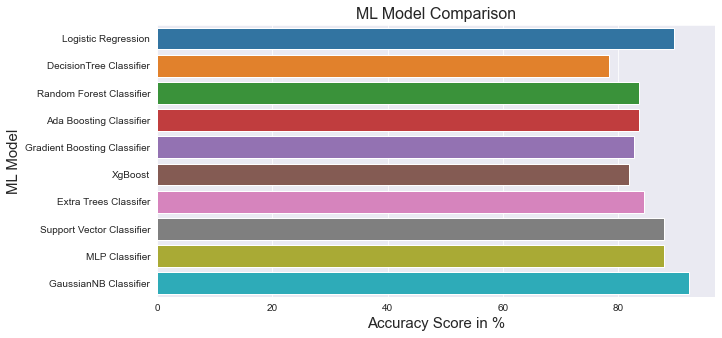

In [194]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that GaussianNB Classifier(92.24%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [195]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
2,Random Forest Classifier,83.62,80.08,0.035397
5,XgBoost,81.90,78.00,0.038981
3,Ada Boosting Classifier,83.62,79.56,0.040600
4,Gradient Boosting Classifier,82.76,78.18,0.045817
7,Support Vector Classifier,87.93,81.81,0.061229
1,DecisionTree Classifier,78.45,72.27,0.061754
8,MLP Classifier,87.93,80.77,0.071619
6,Extra Trees Classifer,84.48,77.30,0.071784
0,Logistic Regression,89.66,81.98,0.076732
9,GaussianNB Classifier,92.24,81.98,0.102594


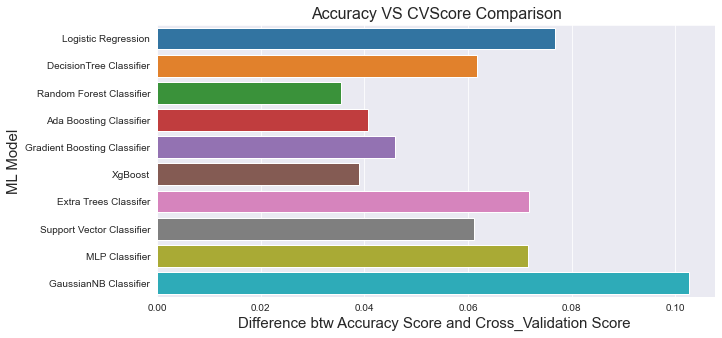

In [196]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is RandomForest Classifier!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
- The least difference is 0.035
- The Model with least difference is RandomForest Classifer!

# Hence Optimum Machine Model Chosen = RandomForest Classifer!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [197]:
#intializing...
rf=RandomForestClassifier()

In [198]:
grid_param = {'n_estimators':[13,15],'criterion' : ['gini','entropy'], 'max_depth':[10,15],'min_samples_leaf':[5,6],'min_samples_split':[10,11]}

In [199]:
grid_search=GridSearchCV(rf,param_grid=grid_param)
grid_search.fit(x_train_ns, y_train_ns)
print("Best Parameter = ",grid_search.best_params_)

Best Parameter =  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [200]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100)

In [201]:
rf.fit(x_train_ns,y_train_ns)#Training with the best parameters

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10)

In [202]:
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  87.07
Confusion Matrix  [[17 10]
 [ 5 84]]
Classification Report                precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.89      0.94      0.92        89

    accuracy                           0.87       116
   macro avg       0.83      0.79      0.81       116
weighted avg       0.87      0.87      0.87       116



# Hence Final Accuracy = 87%!

# Step 8 - ROC AUC PLOT

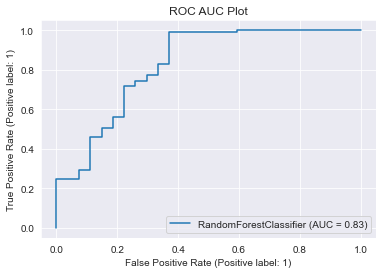

In [203]:
plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy Score: 87% and AUC Score is 83% 
- That the RandomForest Classifier has an AUC close to 1(i.e 0.83)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 9 - MODEL SAVING

In [204]:
filename='Machine_Model_Project_Loan_Application'
pickle.dump(rf,open(filename,'wb'))